In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
sonar = fetch_openml(name='sonar', version=1, as_frame=True)
X = sonar.data.values
y = sonar.target.values

# Encode class labels (Rock/Mine → 0/1)
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA (only 1 component possible for 2 classes)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y_enc)

# Get feature loadings
loadings = lda.scalings_[:, 0]  # shape (60,)
feature_names = sonar.feature_names

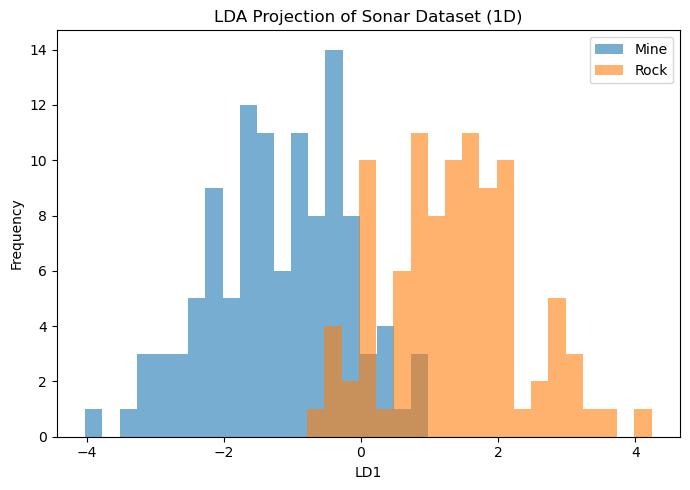

In [2]:
plt.figure(figsize=(7, 5))
for class_index, class_name in enumerate(class_names):
    plt.hist(X_lda[y_enc == class_index], bins=20, alpha=0.6, label=class_name)

plt.xlabel('LD1')
plt.ylabel('Frequency')
plt.title('LDA Projection of Sonar Dataset (1D)')
plt.legend()
plt.tight_layout()
plt.show()

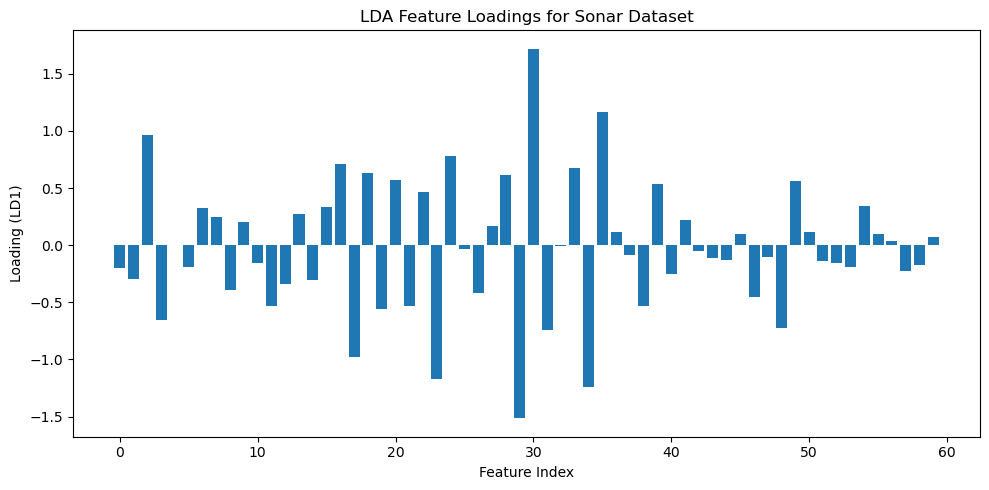

In [3]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(loadings)), loadings)
plt.xlabel("Feature Index")
plt.ylabel("Loading (LD1)")
plt.title("LDA Feature Loadings for Sonar Dataset")
plt.tight_layout()
plt.show()

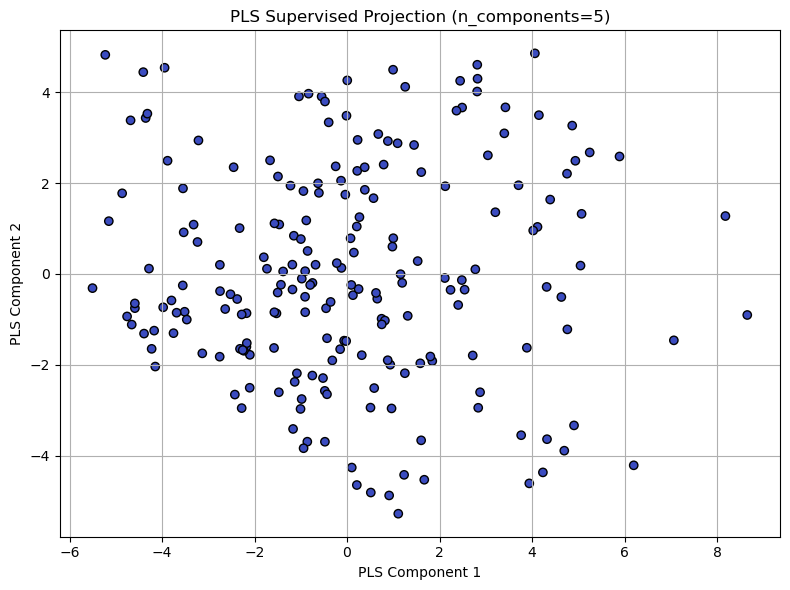

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Load Sonar dataset
data = fetch_openml(name='sonar', version=1, as_frame=True)
X = data.data.values
y = data.target.values

# One-hot encode class labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PLS with N components
n_components = 5
pls = PLSRegression(n_components=n_components)
pls.fit(X_scaled, y_onehot)

# Transform features into supervised components
X_pls = pls.transform(X_scaled)

# Optional: plot the new features
plt.figure(figsize=(8, 6))
plt.scatter(X_pls[:, 0], X_pls[:, 1], c=(y == 'R'), cmap='coolwarm', edgecolor='k')
plt.xlabel('PLS Component 1')
plt.ylabel('PLS Component 2')
plt.title(f'PLS Supervised Projection (n_components={n_components})')
plt.grid(True)
plt.tight_layout()
plt.show()

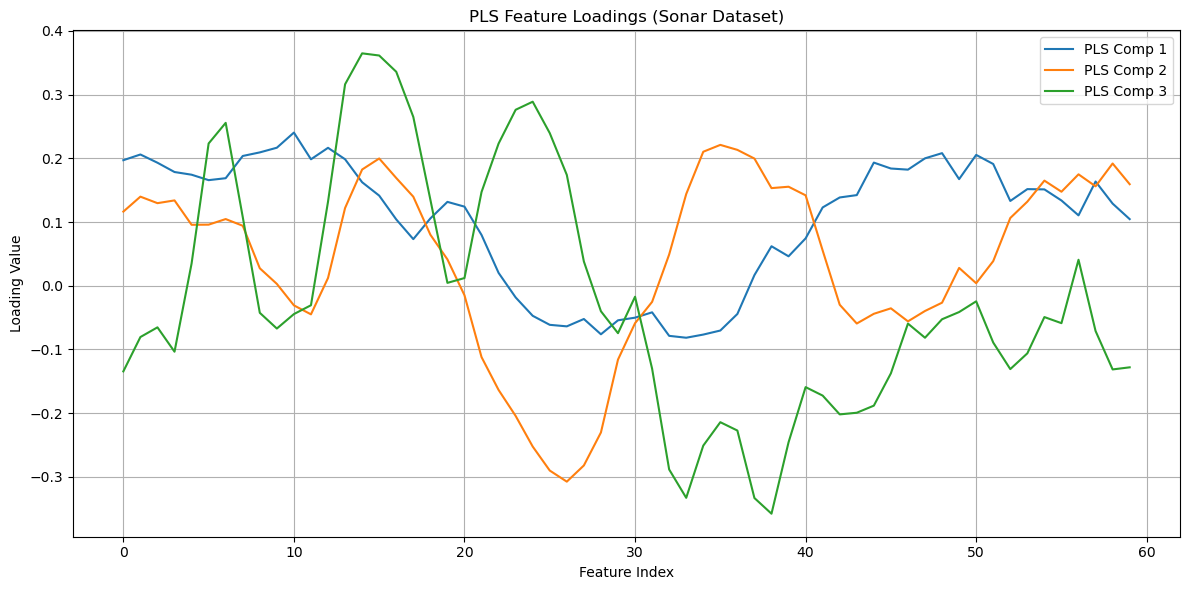

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load Sonar data
data = fetch_openml(name='sonar', version=1, as_frame=True)
X = data.data.values
y = data.target.values

# Encode labels
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PLS model
n_components = 3
pls = PLSRegression(n_components=n_components)
pls.fit(X_scaled, y_onehot)

# Get loadings: shape (n_features, n_components)
loadings = pls.x_loadings_
n_features = X.shape[1]
feature_indices = np.arange(n_features)

# Plot loadings using Matplotlib OO API
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(n_components):
    ax.plot(feature_indices, loadings[:, i], label=f'PLS Comp {i + 1}')

ax.set_xlabel("Feature Index")
ax.set_ylabel("Loading Value")
ax.set_title("PLS Feature Loadings (Sonar Dataset)")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


In [16]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, f1_score

# Load and prepare data
data = fetch_openml(name='sonar', version=1, as_frame=True)
X = data.data.values
y = data.target.values

# Encode class labels to integers
label_encoder = LabelEncoder()
y_enc = label_encoder.fit_transform(y)  # Rock = 1, Mine = 0


# Build pipeline: scaling → PLS → classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pls', PLSRegression(n_components=n_components)),
    ('clf', LogisticRegression(max_iter=1000, solver='liblinear'))
])

n_splits = 5
random_state = 42

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

# Use binary F1 score as evaluation metric
f1 = make_scorer(f1_score)

# Run cross-validation
scores = cross_val_score(pipeline, X, y_enc, cv=cv, scoring=f1)

# Print results
print(f"Cross-validated F1 scores ({n_splits}-fold): {scores}")
print(f"Mean F1 score: {scores.mean():.3f} ± {scores.std():.3f}")

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/lib/python3.13/site-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
    ~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.13/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py", line 1222, in fit
    X, y = validate_data(
           ~~~~~~~~~~~~~^
        self,
        ^^^^^
    ...<5 lines>...
        accept_large_sparse=solver not in ["liblinear", "sag", "saga"],
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/usr/lib/python3.13/site-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        X,
    ...<12 lines>...
        input_name="X",
    )
  File "/usr/lib/python3.13/site-packages/sklearn/utils/validation.py", line 1101, in check_array
    raise ValueError(
    ...<2 lines>...
    )
ValueError: Found array with dim 3. LogisticRegression expected <= 2.


In [28]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score

from sklearn.ensemble import RandomForestClassifier

# Load data
data = fetch_openml(name='sonar', version=1, as_frame=True)
X = data.data.values
y = data.target.values

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

n_components = 5
n_splits = 5
random_state = 42

# Set up CV
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

f1_scores = []

for train_idx, test_idx in cv.split(X, y_enc):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_enc[train_idx], y_enc[test_idx]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Fit PLS on training set
    pls = PLSRegression(n_components=n_components)
    pls.fit(X_train_scaled, y_train.reshape(-1, 1))  # y as 2D for PLS regression

    # Transform features
    X_train_pls = pls.transform(X_train_scaled)
    X_test_pls = pls.transform(X_test_scaled)

    # Train classifier on transformed features
    clf = LogisticRegression(max_iter=1000, solver='liblinear')
    clf = RandomForestClassifier(random_state=random_state)
    clf.fit(X_train, y_train)

    # Predict & evaluate
    y_pred = clf.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

print(f'Cross-validated F1 scores: {f1_scores}')
print(f'Mean F1 score: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}')

Cross-validated F1 scores: [0.7647058823529411, 0.7647058823529411, 0.7619047619047619, 0.8823529411764706, 0.8333333333333334]
Mean F1 score: 0.801 ± 0.049


In [33]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
import tensorflow as tf

# Load dataset
data = fetch_openml(name='sonar', version=1, as_frame=True)
X = data.data.values
y = data.target.values

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = []

for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X, y_enc), start=1):
    print(f"\n🔁 Fold {fold_idx}")
    
    # Clear previous model from memory
    clear_session()

    # Split
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_enc[train_idx], y_enc[test_idx]

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape for Conv1D: (samples, time_steps, channels)
    X_train_cnn = X_train_scaled[..., np.newaxis]
    X_test_cnn = X_test_scaled[..., np.newaxis]

    # Build CNN
    model = Sequential([
        InputLayer(input_shape=(60, 1)),
        Conv1D(16, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(32, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    # Compile
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train
    model.fit(X_train_cnn, y_train, epochs=30, batch_size=16, verbose=0)

    # Predict
    y_pred = (model.predict(X_test_cnn) > 0.5).astype(int).flatten()

    # Evaluate
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f"✅ Fold {fold_idx} F1 Score: {f1:.3f}")

# Final results
print(f"\n📊 Mean F1 Score: {np.mean(f1_scores):.3f} ± {np.std(f1_scores):.3f}")


🔁 Fold 1


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
✅ Fold 1 F1 Score: 0.850

🔁 Fold 2


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
✅ Fold 2 F1 Score: 0.850

🔁 Fold 3


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
✅ Fold 3 F1 Score: 0.791

🔁 Fold 4


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
✅ Fold 4 F1 Score: 0.882

🔁 Fold 5


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
✅ Fold 5 F1 Score: 0.811

📊 Mean F1 Score: 0.837 ± 0.032


In [44]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session

# Load and preprocess
data = fetch_openml(name='sonar', version=1, as_frame=True)
X = data.data.values
y = LabelEncoder().fit_transform(data.target.values)
X = StandardScaler().fit_transform(X)

# Reshape for CNN
X = X[..., np.newaxis]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Baseline model
def build_model(input_len):
    model = Sequential([
        InputLayer(input_shape=(input_len, 1)),
        Conv1D(32, kernel_size=5, activation='relu'),
        MaxPooling1D(2),
        Dropout(0.2),
        Conv1D(64, kernel_size=5, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy')
    return model

# Train baseline model
clear_session()
baseline_model = build_model(60)
baseline_model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)
baseline_f1 = f1_score(y_test, (baseline_model.predict(X_test) > 0.5).astype(int))
print(f"Baseline F1: {baseline_f1:.3f}")

# Sliding window occlusion
window_size = 20
step = 1
f1_drops = []

for start in range(0, 60 - window_size + 1, step):
    X_test_occluded = X_test.copy()
    X_test_occluded[:, start:start+window_size, 0] = 0  # Zero out the window

    preds = (baseline_model.predict(X_test_occluded) > 0.5).astype(int)
    f1 = f1_score(y_test, preds)
    drop = baseline_f1 - f1
    f1_drops.append((start, start+window_size, drop))
    print(f"Occluding [{start}:{start+window_size}] → F1 drop: {drop:.3f}")

/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Baseline F1: 0.850
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Occluding [0:20] → F1 drop: 0.140
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Occluding [1:21] → F1 drop: 0.100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Occluding [2:22] → F1 drop: 0.107
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Occluding [3:23] → F1 drop: 0.107
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Occluding [4:24] → F1 drop: 0.128
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Occluding [5:25] → F1 drop: 0.147
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Occluding [6:26] → F1 drop: 0.152
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Occluding [7:27] → F1 drop: 0.094
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Occluding [8:28] → F1 drop: 0.130
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Occluding [9:29] → F1 drop: 0.158
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Occluding [10:30] → F1 drop: 0.170
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Occluding [11:31] → F1 drop: 0.119
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Occluding [12:32] → F1 drop: 0.105
2/2 

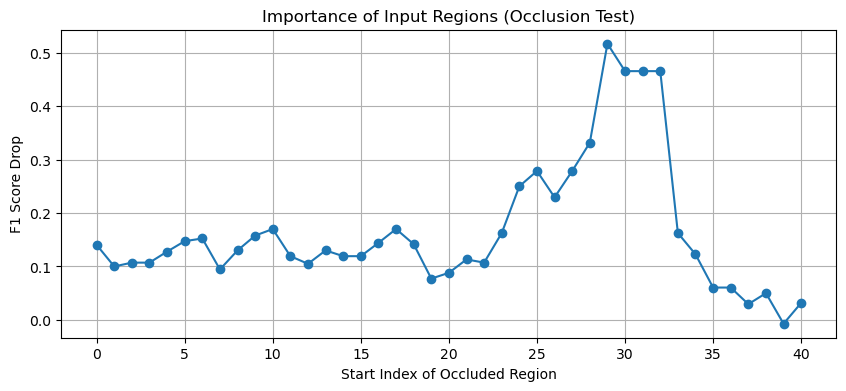

In [45]:
import matplotlib.pyplot as plt

starts = [s for s, _, _ in f1_drops]
drops = [d for _, _, d in f1_drops]

plt.figure(figsize=(10, 4))
plt.plot(starts, drops, marker='o')
plt.xlabel('Start Index of Occluded Region')
plt.ylabel('F1 Score Drop')
plt.title('Importance of Input Regions (Occlusion Test)')
plt.grid(True)
plt.show()


In [46]:

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
from scipy.ndimage import uniform_filter1d

# Load and preprocess
data = fetch_openml(name='sonar', version=1, as_frame=True)
X = data.data.values
y = LabelEncoder().fit_transform(data.target.values)
X = StandardScaler().fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Reshape for CNN input
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Define baseline CNN model
def build_model(input_len):
    model = Sequential([
        InputLayer(input_shape=(input_len, 1)),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Dropout(0.2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy')
    return model

# Train and evaluate a model on given X_train/X_test
def train_and_eval(X_train_mod, X_test_mod):
    clear_session()
    model = build_model(X_train_mod.shape[1])
    model.fit(X_train_mod, y_train, epochs=30, batch_size=16, verbose=0)
    y_pred = (model.predict(X_test_mod) > 0.5).astype(int).flatten()
    return f1_score(y_test, y_pred)

In [53]:
print("\n--- Smoothing F1 (Moving Avg) ---")
kernel_sizes = [1, 3, 5, 9, 13, 17, 21, 29, 39, 45, 55, 61, 75]  # 1 = no smoothing

from scipy.ndimage import median_filter

for k in kernel_sizes:
    #X_train_smooth = uniform_filter1d(X_train.squeeze(), size=k, axis=1)
    #X_test_smooth = uniform_filter1d(X_test.squeeze(), size=k, axis=1)

    X_train_smooth = median_filter(X_train.squeeze(), size=k, axes=1)
    X_test_smooth = median_filter(X_test.squeeze(), size=k, axes=1)
    
    # Add channel dimension back
    X_train_smooth = X_train_smooth[..., np.newaxis]
    X_test_smooth = X_test_smooth[..., np.newaxis]

    f1 = train_and_eval(X_train_smooth, X_test_smooth)
    print(f"Smoothing kernel {k}: F1: {f1:.3f}")


--- Smoothing F1 (Moving Avg) ---


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Smoothing kernel 1: F1: 0.900


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Smoothing kernel 3: F1: 0.850


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Smoothing kernel 5: F1: 0.857


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Smoothing kernel 9: F1: 0.811


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Smoothing kernel 13: F1: 0.810


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Smoothing kernel 17: F1: 0.789


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Smoothing kernel 21: F1: 0.757


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Smoothing kernel 29: F1: 0.800


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Smoothing kernel 39: F1: 0.686


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Smoothing kernel 45: F1: 0.757


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Smoothing kernel 55: F1: 0.649


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Smoothing kernel 61: F1: 0.600


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Smoothing kernel 75: F1: 0.606


In [55]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session

# Load and preprocess
data = fetch_openml(name='sonar', version=1, as_frame=True)
X = data.data.values
y = LabelEncoder().fit_transform(data.target.values)
X = StandardScaler().fit_transform(X)

# FFT: keep both real and imaginary parts
X_fft_complex = np.fft.rfft(X, axis=1)

# Split real and imaginary parts
X_real = np.real(X_fft_complex)
X_imag = np.imag(X_fft_complex)

# Option 1: Stack real & imag as 2 channels (shape: [samples, freqs, 2])
X_fft_2ch = np.stack([X_real, X_imag], axis=-1)

# Normalize each channel separately
n_samples, n_freqs, _ = X_fft_2ch.shape
X_fft_2ch = X_fft_2ch.reshape(n_samples, -1)
X_fft_2ch = StandardScaler().fit_transform(X_fft_2ch)
X_fft_2ch = X_fft_2ch.reshape(n_samples, n_freqs, 2)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_fft_2ch, y, stratify=y, test_size=0.2, random_state=42)

# CNN for 2-channel input
def build_model(input_len, input_channels):
    model = Sequential([
        InputLayer(input_shape=(input_len, input_channels)),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Dropout(0.2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy')
    return model

# Train & evaluate
clear_session()
model = build_model(X_train.shape[1], X_train.shape[2])
model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)

# F1 Score
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
f1 = f1_score(y_test, y_pred)
print(f"FFT with phase (real + imag): F1 score = {f1:.3f}")


/usr/lib/python3.13/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
FFT with phase (real + imag): F1 score = 0.842


In [61]:
# Sliding window occlusion
window_size = 5
step = 1
f1_drops = []

# Train baseline model
clear_session()
baseline_model = build_model(31, 2)
baseline_model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)
baseline_f1 = f1_score(y_test, (baseline_model.predict(X_test) > 0.5).astype(int))
print(f"Baseline F1: {baseline_f1:.3f}")

for start in range(0, 31 - window_size + 1, step):
    X_test_occluded = X_test.copy()
    X_test_occluded[:, start:start+window_size, 0] = 0  # Zero out the window

    preds = (baseline_model.predict(X_test_occluded) > 0.5).astype(int)
    f1 = f1_score(y_test, preds)
    drop = baseline_f1 - f1
    f1_drops.append((start, start+window_size, drop))
    print(f"Occluding [{start}:{start+window_size}] → F1 drop: {drop:.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Baseline F1: 0.743
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Occluding [0:5] → F1 drop: 0.098
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Occluding [1:6] → F1 drop: 0.057
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Occluding [2:7] → F1 drop: -0.035
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Occluding [3:8] → F1 drop: 0.011
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Occluding [4:9] → F1 drop: -0.026
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Occluding [5:10] → F1 drop: 0.006
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Occluding [6:11] → F1 drop: 0.076
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Occluding [7:12] → F1 drop: 0.096
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Occluding [8:13] → F1 drop: 0.162
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Occluding [9:14] → F1 drop: 0.162
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Occluding [10:15] → F1 drop: 0.055
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Occluding [11:16] → F1 drop: 0.055
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Occluding [12:17] → F1 drop: -0.057
2/2 ━━

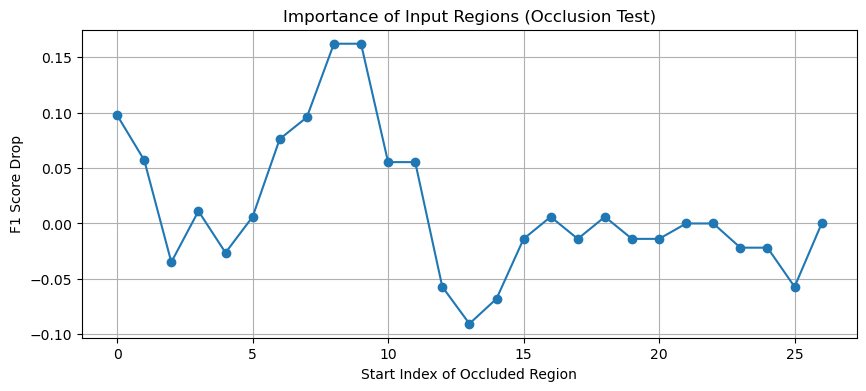

In [62]:
import matplotlib.pyplot as plt

starts = [s for s, _, _ in f1_drops]
drops = [d for _, _, d in f1_drops]

plt.figure(figsize=(10, 4))
plt.plot(starts, drops, marker='o')
plt.xlabel('Start Index of Occluded Region')
plt.ylabel('F1 Score Drop')
plt.title('Importance of Input Regions (Occlusion Test)')
plt.grid(True)
plt.show()
